In [329]:
from PIL import Image
import numpy as np
import os
import scipy
from mpldatacursor import datacursor
from scipy import ndimage
import warnings,glob
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    %matplotlib nbagg
    import matplotlib.pyplot as plt
    import matplotlib
files = glob.glob("/Users/rein/Desktop/remote_june_7/resize_capt_multi_*.jpg")
dark = np.load("dark.npy")

In [330]:
white = np.array(Image.open("white.jpg"), dtype=np.float32)
wr,wg,wb=np.max(np.max(white,axis=0),axis=0)
ones = np.ones((white.shape[0],white.shape[1]))
white /= np.stack([wr*ones, wg*ones, wb*ones],axis=2)

<IPython.core.display.Javascript object>


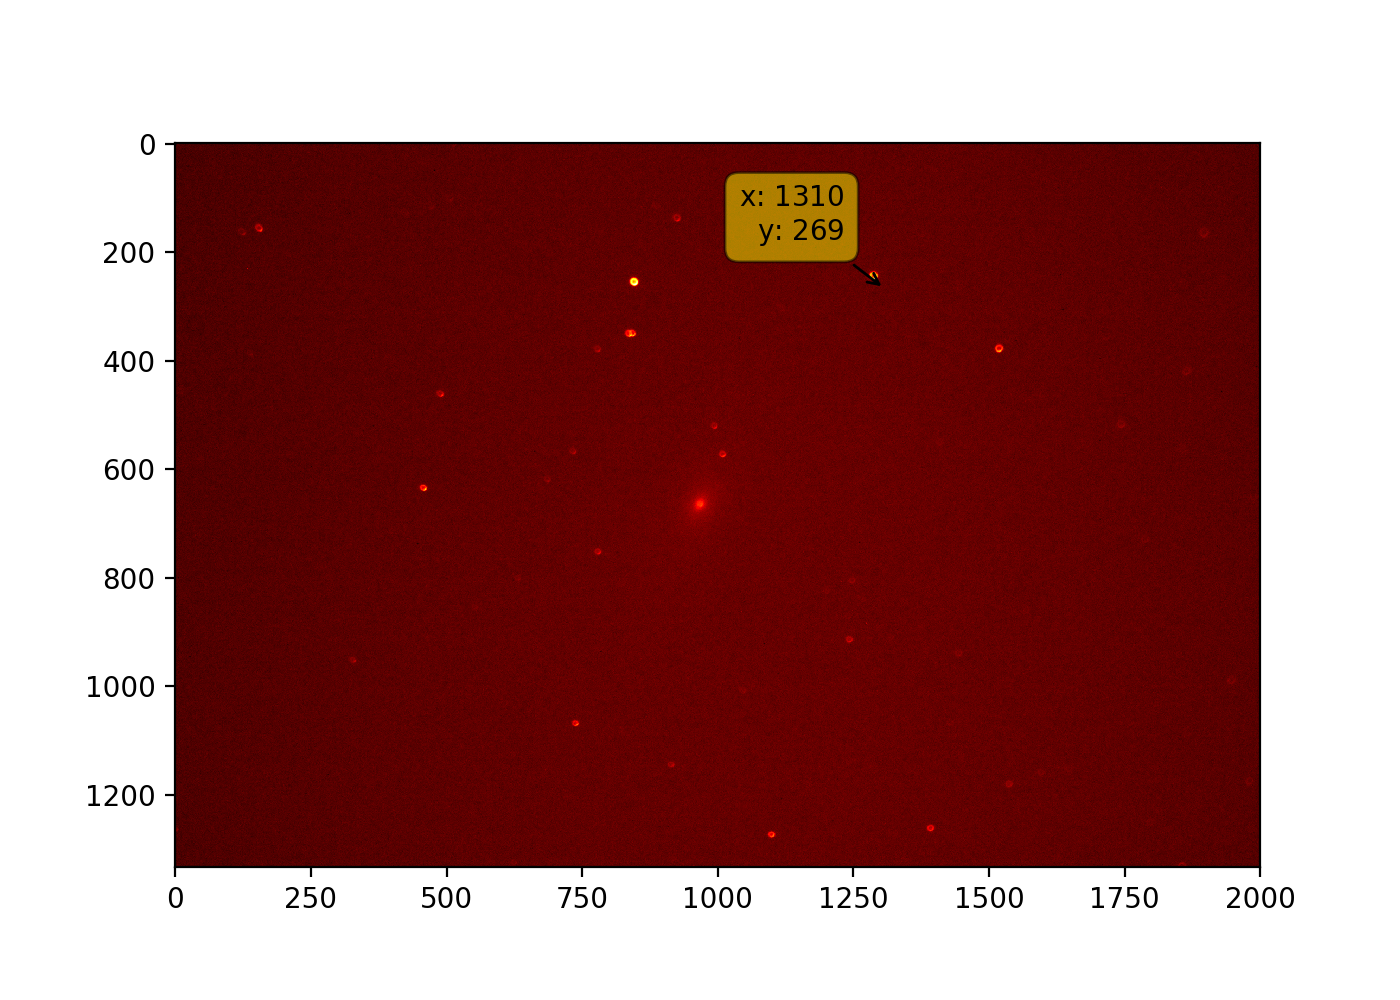

In [358]:
f = files[0]
refi = np.average((np.array(Image.open(f), dtype=np.float32)-dark),axis=2)
fig, ax = plt.subplots(figsize=(7,5))
ax.imshow(refi, cmap="hot")
dc = datacursor(ax)

In [359]:
for k in dc.annotations:
    ry, rx = dc.annotations[k].xy
    print(rx, ry)
radius = 150

269.110599078 1310.04147465


In [360]:
def cmask(x,y,radius,shape):
    nx,ny = shape
    y,x = np.ogrid[-x:nx-x,-y:ny-y]
    mask = x*x + y*y >= radius*radius
    return mask
mask = cmask(rx,ry,radius,refi.shape)
blurred = scipy.ndimage.filters.gaussian_filter(refi, sigma=10)
am = np.argmax(np.ma.masked_array(blurred,mask))
refx, refy = np.unravel_index(am,refi.shape)
print(refx,refy)

244 1287


In [361]:
s = None
shifts = np.zeros((len(files),2))
for j,f in enumerate(files):
    i = np.average((np.array(Image.open(f), dtype=np.float32)-dark),axis=2)
    blurred = scipy.ndimage.filters.gaussian_filter(i, sigma=10)
    am = np.argmax(np.ma.masked_array(blurred,mask))
    ix, iy = np.unravel_index(am,i.shape)
    shifts[j] = [ix-refx,iy-refy]
    i = np.roll(i,-iy+refy,axis=1)
    i = np.roll(i,-ix+refx,axis=0)
    if s is None:
        s = i
    else:
        s += i

<IPython.core.display.Javascript object>


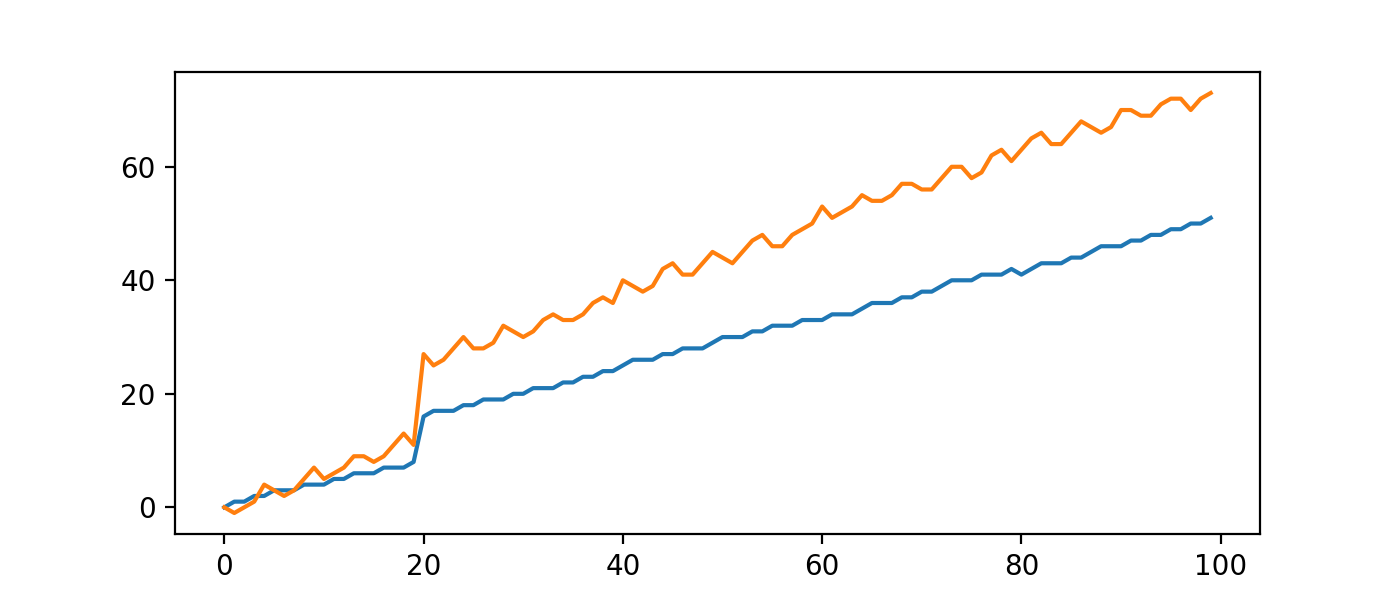

In [362]:
s/=len(files)
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(shifts[:,0])
ax.plot(shifts[:,1])

In [363]:
smin = np.min(s)
smax = np.max(s)
p = np.log((s-smin)/(smax-smin))

vmin, vmax = np.percentile(p,10),np.percentile(p,99.927)
print(vmin,vmax)

-4.18365001678 -1.69525077418


/Users/rein/git/rebound/venv/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


<IPython.core.display.Javascript object>


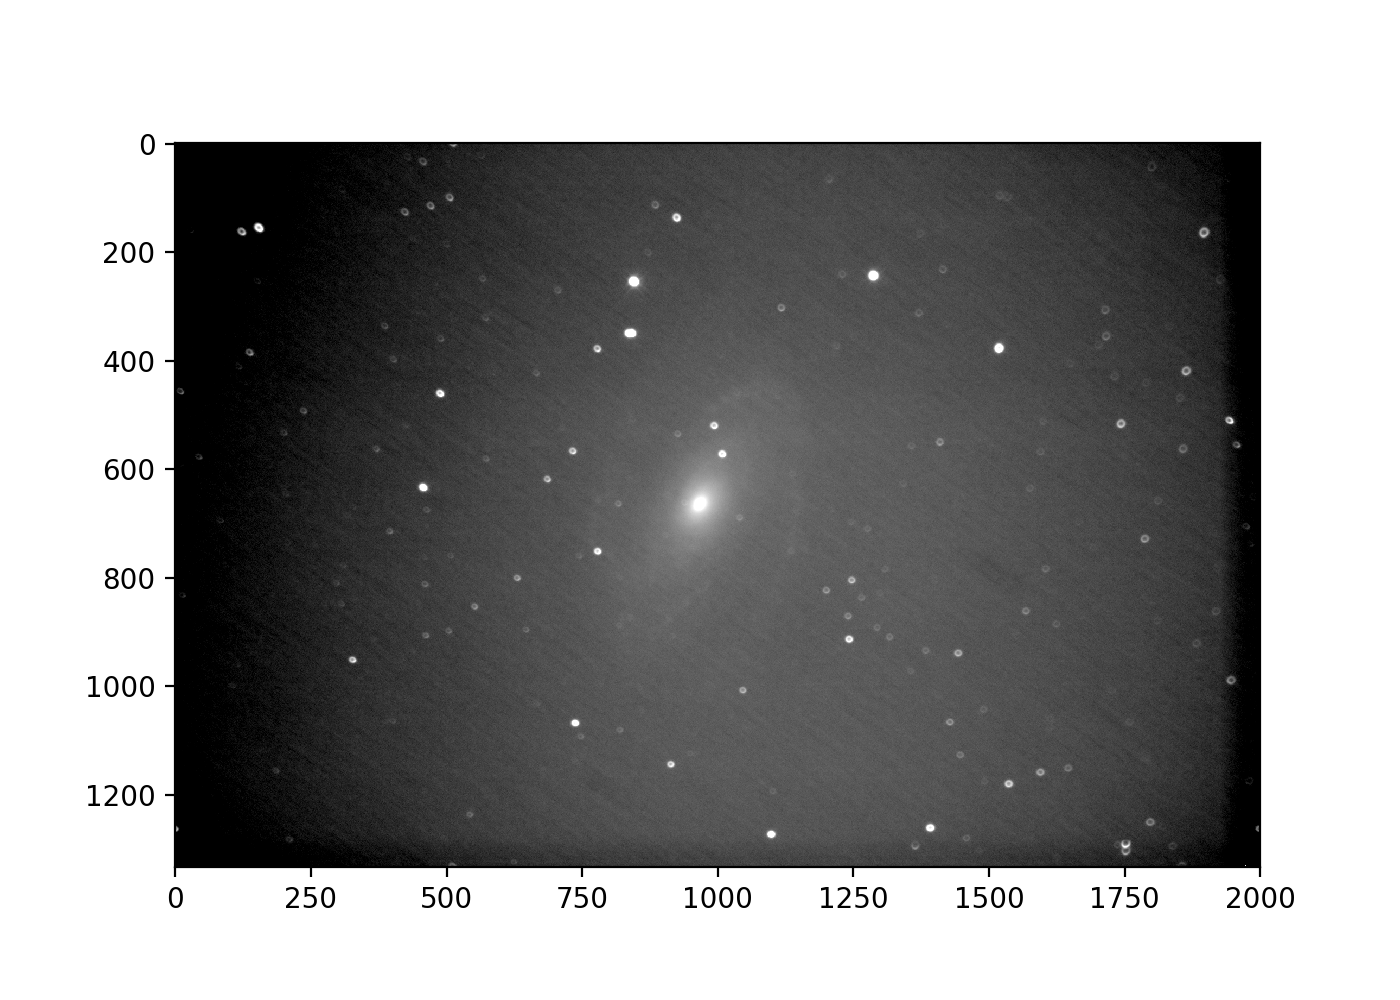

In [364]:
fig, ax = plt.subplots(figsize=(7,5))
ax.imshow(p, vmin=vmin,vmax=vmax,cmap="gray")

In [339]:
scipy.misc.toimage(p, cmin=vmin, cmax=vmax).save('stacked.jpg')


In [311]:
white = np.array(Image.open("white.jpg"), dtype=np.float32)
wr,wg,wb=np.max(np.max(white,axis=0),axis=0)
ones = np.ones((white.shape[0],white.shape[1]))
white /= np.stack([wr*ones, wg*ones, wb*ones],axis=2)

In [315]:
np.max(np.min(white,axis=0),axis=0)

array([ 0.6958763 ,  0.52499998,  0.34782609], dtype=float32)